# Web Scraping

Throughout this course we have seen several methods for accessing the data we need for our analysis. Sometimes it might comes as a csv file, other times we might connect to a SQL database. What happens if the data you need is on the internet?

This is where web scraping comes in.

Web scraping is a tool for extracting information from the webpages that we can use in our analysis. In this workbook we will look at a couple of different ways of extracting data.

## How do they work?

The issue with websites is that they are (understandably) written for human consumption, not machines. If I want to get some information on a topic (say, how to write a web scraper) I can search for a website online and read the information myself. 

This works well for us, and if we wanted to extract some information from a website we can just write it down ourselves. If however, we want more data and want to do it automatically, we need a web scraping tool. But they cannot read website like we do, so they need a workaround. 

The solution is actually quite simple. When you build a web scraper you supply it with the URL (Uniform Resource Locator) where the information is stored and it will load the entire HTML (Hyper-Text Markup Language) code. You can then tell the scraper what parts of the HTML code you want and it will return it to you in a usable format. 

However, before we get into building web scrapers we need to think about the legal bit.

## How legal is this?

The answer depends on the data you are extracting. If it is public data (i.e. on a public webpage like Wikipedia) then it is fair game and you can extract it. If it is private or confidential data then you cannot just take it (that would be illegal). For example, if the data is kept behind a paywall or within a secured server then you cannot extract it without the owner's permission.

Another issue with web scraping is how it might affect a server. All web pages are hosted on a server somewhere on the planet, and there is only so much capacity they can handle. To give an example, think about when a popular artist releases tickets for an upcoming concert, potentially hundreds of thousands of fans may try and access the website at the same time. Unless the website has capacity or an effective funnel system in place, the website is liable to crash because the server cannot handle that many people accessing its content at once.

How does this relate to web scraping? When you write a scraper, it is effectively acting as a person accessing a website. However, computers can do this much faster than we can and if you are trying to access lots of data your scraper may be hitting the server multiple times per second. This can cause the server to slow down, or even crash (which the owner will not appreciate...). When we come to build the scraper we will look at how we can slow them down.

Related to this then, many websites put into place CAPTCHAs (Completely Automated Public Turing test to tell Computers and Humans Apart) as a way to prevent web scrapers from crashing their website. It is likely you have seen one before (click on all the square with a bicycle, tick to confirm you are not a robot, etc). As these are not part of the HTML on the page when accessing the website, it is difficult to program the scraper to deal with them when they arise (which is what they are meant to do).

However, most website only put these tests at the end of a form, not on the initial page you are trying to find the data. But even then, there are still checks going on. Most websites will have in the background a CAPTCHA that is analysing the behaviour of someone accessing the website (mouse clicks and keystrokes for example). Most humans can't do hundreds of clicks a second, but a web scraper can. If these CAPTCHAs detect your scraper they may block the IP (Internet Protocol) address. Later we will look at how we can program a scraper to mimic human behaviour.

If you are interested in CAPTCHAs, here is an <a href='https://www.youtube.com/watch?v=o1zNIm8GVPY&t=316s&ab_channel=TomScott'>interesting video which describes them in more detail.</a>

## APIs

Before we get into web scraping, we first need to look at Application Programming Interfaces (APIs). If you are looking to extract lots of data from a website, potentially to the point of causing problems on their server, you should check if they don't already give access via an API.

An API is an intermediary that allows your code to speak with a server, so for example, if you wanted to retrieve information from a website directly, you can use an API (if they have set one up) to access the data directly as opposed to scraping it. Many website which hold large amounts of data (e.g. Spotify) have APIs which you can use. Be careful to check their limit policy however, most website will only allow you to make a limited amount of requests per day/week/month for free. If you want to do more than that you will need to pay.

Let's do an example now with IMDb (Internet Movie Database). IMDb holds a lot of data on movies and tv shows for our own interest, but searching through the website manually can be a chore. To help anyone looking to use movie information as part of an analysis project, IMBd set up an API for us to access the data directly.

### Practice

Head to the <a href='https://imdb-api.com/api'>IMDb API</a> webpage and set up a free account (Register). You are allows to make 100 requests a day for free, which is plenty for this exercise.

Once you have confirmed your email, go back to the webpage and click on <b>IMDB API DOCUMENTATION</b> and take note of the <i>API Key</i>. This is your personal code for accessing the information on the server.

Next, let's take a look at the code below to lookup Star Wars. To find any film you need to know its code, it can be found by looking at the URL of the webpage for that film - https://www.imdb.com/title/tt0076759/.

In [2]:
import requests #The requests library allows us to retrieve information from the internet
import json  #The json library will convert the output of our API request into a JSON format (dictionary)

country_code='cr'#Enter the two letter country code of the country to lookup

url = "http://api.worldbank.org/v2/country/{code}?format=json".format(code=country_code) # Enter the API URL with the country code

response = requests.get(url)  # Retrieves the information from the URL

json_response = response.json() #converts output into JSON format we can use
dictionary = json.dumps(response.json(), sort_keys = True, indent = 4) #formats output into an easier-to-read dictionary
print(dictionary)

[
    {
        "page": 1,
        "pages": 1,
        "per_page": "50",
        "total": 1
    },
    [
        {
            "adminregion": {
                "id": "LAC",
                "iso2code": "XJ",
                "value": "Latin America & Caribbean (excluding high income)"
            },
            "capitalCity": "San Jose",
            "id": "CRI",
            "incomeLevel": {
                "id": "UMC",
                "iso2code": "XT",
                "value": "Upper middle income"
            },
            "iso2Code": "CR",
            "latitude": "9.63701",
            "lendingType": {
                "id": "IBD",
                "iso2code": "XF",
                "value": "IBRD"
            },
            "longitude": "-84.0089",
            "name": "Costa Rica",
            "region": {
                "id": "LCN",
                "iso2code": "ZJ",
                "value": "Latin America & Caribbean "
            }
        }
    ]
]


From here we can retrieve whatever information we would like on the country by indexing the dictionary and calling the specific key (in this case, the 'capitalCity'):

In [3]:
json_response[1][0]['capitalCity']

'San Jose'

## Practice

Update the code above to look up information on additional countries.

In [ ]:
#A:

There are many more APIs out there for you to discover, many with free daily limits. But what if the website does not have an API, that's where we need a web scraper.

## Along came a spider

Web scrapers are fairly easy to build in python and have many applications. They are mostly used for automating data retrieval from websites where information is often changing. For example, if you need to the latest currency conversion from £ -> $ then you can write a scraper that collects this information and supplies it to your model automatically. This saves you from rewriting the model each time you need it to account for the currency change.

Generally, most websites will be fine with you scraping their data for non-profit reasons (like practising building a scraper). They may take exemption if you are doing it to make money, so you need to check the websites terms and conditions before you start. If you are scraping for business reasons, you would be better asking them or checking if there is an API you can use.

Another disadvantage of web scraping is that there is no one-size-fits-all approach. All websites are different, and what works on one might not work on another. This isn't even taking into account that websites can change, so what works today might not work tomorrow. Again, using an API gets around this problem.

So let's start to build a scraper, for this exercise we are going to be using <a href='https://www.scrapethissite.com/pages/'>Web Scraping Sandbox</a>, a website purpose built for practising webscraping.

First, check the website. Click on the link and then go to "Countries of the World: A Simple Example". We are going to build a scraper that will allow us to build a pandas dataframe that for each country shows their capital, population, area and density.

To do this we will need two libraries, requests which handles the retrieval of the HTML code from the URL, and BeautifulSoup which allows us to get the information from the HTML.

In [4]:
import requests
from bs4 import BeautifulSoup

Next you will need the URL where the information is going to be stored. A URL typically contains two pieces of information we need:

<ul>
    <li> <b>Base</b>- The path which takes you to the website, and will be constant for any page you visit there.</li>
    <li> <b> Specific location</b> - The part of the URL which directs you to the specific page.</li>
</ul>

A URL may also contain <b>query parameters</b> which are added when you specifically want to search for something (i.e. looking for a specific location on AirBnB.

In [5]:
URL='https://www.scrapethissite.com/pages/simple/'

Once you have the URL you can write the scraper, which you can see below. This is a simple example so only needs one line of code:

In [6]:
page=requests.get(URL)

And that's it! Within this variable called page, all the information on the webpage from the URL is contained, let's see what it looks like:

In [7]:
print(page.text)

<!doctype html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <title>Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping</title>
    <link rel="icon" type="image/png" href="/static/images/scraper-icon.png" />

    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta name="description" content="A single page that lists information about all the countries in the world. Good for those just get started with web scraping.">

    <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" rel="stylesheet" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" crossorigin="anonymous">
    <link href='https://fonts.googleapis.com/css?family=Lato:400,700' rel='stylesheet' type='text/css'>
    <link rel="stylesheet" type="text/css" href="/static/css/styles.css">

    
<meta name=

That is all the HTML code from that webpage, but it still isn't in a usable format. We need it to move into a python object, this is where BeautifulSoup comes in:

In [8]:
soup = BeautifulSoup(page.content, "html.parser")

In [9]:
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping</title>
<link href="/static/images/scraper-icon.png" rel="icon" type="image/png"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="A single page that lists information about all the countries in the world. Good for those just get started with web scraping." name="description"/>
<link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css?family=Lato:400,700" rel="stylesheet" type="text/css"/>
<link href="/static/css/styles.css" rel="stylesheet" type="text/css"/>
<meta content="noindex" name="robots"/>
<link h

Now, you might be thinking, "Hang on! That is pretty much the same thing!", and you'd be right. Except it is now a BeautifulSoup object which we can now use to extract the information (whereas before it was just one long string).

So how do we get this information?

First we have to consider what HTML is.

### HTML

HTML stands for Hyper-Text Markup Language and is a coding language that allows us to place objects on a browser. Whenever you load a webpage, the browser reads the HTML and knows what to display. The website we are using in this demo is a static website (content doesn't change) so easy for us to retrieve the information from. Other websites are dynamic (content changes as the user manouvers around the page, like a twitter feed) which requires a different technique when scraping.

So how does a computer know what to place where?

This comes from the tags. Each block (contained within <>) has a tag which tells the browser what it is, common tags include:

<ul>
    <li> div - a division (block)</li>
    <li> p - a paragraph (block of text</li>
    <li> a - a hyperlink </li>
    <li> h1 - a large header </li>
    <li> h2 - a smaller header (this goes down to h5)</li>
    <li> img - an image </li>
</ul>

There are many more tags which you can read about <a href='https://www.w3schools.com/TAgs/default.asp'>here</a>. (If you double click on this block, you might even spot some HTML code...)

You can inspect the HTML code of any webpage quite easily. If you are using Chrome, right-click anywhere on the page and select <i>Inspect</i>. This will bring up the console which will allow you to view the HTML code. This is useful for checking the tags and classes of any element on the page if you want to extract them.

If you are using Safari or Firefox, you select <i>Inspect Element</i>. If you are using Internet Explorer, go to the <b>Tools</b> menu and select <i>Developer Tools</i>.

Browsers then use these tags to know how to display the information, and we can use them to inform our web scraper which part of the HTML we want to extract. If you look to the HTML above, you may also spot that each tag also contains a class. The class is a variable name that is used to describe what this tag is for. Often when building a webpage you will want to repeat the same formatting across the page (color, size, etc) and to avoid repeating this in each block you can define a class, and any tag with that label will have the same formatting applied.

We can use it to specifically class out what parts of the HTML code we want (for example, there may be several div classes and we only want one type).

For example, let's say we wanted to return a h3 object with the class 'country-code'. We can write:

In [10]:
results=soup.find('h3',class_='country-name')
print(results)

<h3 class="country-name">
<i class="flag-icon flag-icon-ad"></i>
                            Andorra
                        </h3>


This has returned the first instance of this particular tag. It has returned everything within this tag, including the image of its flag (which Jupyter Notebook is not able to display). If we wanted the to see the code written properly, we can use `.prettify()`:

In [11]:
print(results.prettify())

<h3 class="country-name">
 <i class="flag-icon flag-icon-ad">
 </i>
 Andorra
</h3>



And if we want to actually extract the information we want (the country name), we just add in `.text`:

In [12]:
results.text

'\n\n                            Andorra\n                        '

Notice this has left in \n, which is a line break. This isn't useful for us, to remove it we can either print the statement, or add `.strip()`:

In [13]:
print(results.text)



                            Andorra
                        


In [14]:
results.text.strip()

'Andorra'

Using `.strip()` means we have now isolated the data we need as a string, which means we can now use it in our analysis!

However, this code has only retrieved the <i>first</i> instance of that HTML class, but there are many more countries on that webpage. To find them all, we use the following code:

In [15]:
results=soup.find_all("h3",class_='country-name') #notice with this code you need to include the tag

This code has located all the h3 tags with the class "country-name", so if we want to extract the information within we need to loop through it. To allow us to work with this data I have appended all the country names to a list:

In [16]:
country_names=[]

for i in results:
    country_names.append(i.text.strip())
    
country_names

['Andorra',
 'United Arab Emirates',
 'Afghanistan',
 'Antigua and Barbuda',
 'Anguilla',
 'Albania',
 'Armenia',
 'Angola',
 'Antarctica',
 'Argentina',
 'American Samoa',
 'Austria',
 'Australia',
 'Aruba',
 'Åland',
 'Azerbaijan',
 'Bosnia and Herzegovina',
 'Barbados',
 'Bangladesh',
 'Belgium',
 'Burkina Faso',
 'Bulgaria',
 'Bahrain',
 'Burundi',
 'Benin',
 'Saint Barthélemy',
 'Bermuda',
 'Brunei',
 'Bolivia',
 'Bonaire',
 'Brazil',
 'Bahamas',
 'Bhutan',
 'Bouvet Island',
 'Botswana',
 'Belarus',
 'Belize',
 'Canada',
 'Cocos [Keeling] Islands',
 'Democratic Republic of the Congo',
 'Central African Republic',
 'Republic of the Congo',
 'Switzerland',
 'Ivory Coast',
 'Cook Islands',
 'Chile',
 'Cameroon',
 'China',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Cape Verde',
 'Curacao',
 'Christmas Island',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Estonia',
 'Egypt',
 'Western Sahara',
 'Eritrea',
 

We have written our first scraper! Now it is your turn.

## Practice

Create a list called capitals which collects all the country capitals from the webpage:

In [17]:
results=soup.find_all("span",class_='country-capital') 
capitals=[]

for i in results:
    capitals.append(i.text.strip())

## Loopception

It is possible to have a scraper work within a scraper to get the information we want. If you look back over the HTML code you will spot that all the country stats are wrapped in a div called "country-info". If we wanted to extract all this information, instead of writing a look for each span tag, we can extract the divs <i>and then</i> extract the different bits of information from there:

In [18]:
soup.find(class_='country-info') 

<div class="country-info">
<strong>Capital:</strong> <span class="country-capital">Andorra la Vella</span><br/>
<strong>Population:</strong> <span class="country-population">84000</span><br/>
<strong>Area (km<sup>2</sup>):</strong> <span class="country-area">468.0</span><br/>
</div>

In [19]:
capital=[]
pop=[]
area=[]

results=soup.find_all("div",class_='country-info') 

for res in results:
    capital.append(res.find(class_='country-capital').text.strip())
    pop.append(res.find(class_='country-population').text.strip())
    area.append(res.find(class_='country-area').text.strip())

With this information we can know build a dataframe which for each country shows the capital, population and area:

In [20]:
import pandas as pd

country_df=pd.DataFrame({'country_name':country_names,
                         'capital':capital,
                         'population':pop,
                         'area':area})

country_df.head()

,country_name,capital,population,area
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0


Have you spotted the issue with this dataframe? 

Try to create a column called population density, which is the population divided by the area.

In [21]:
country_df['population_density']=country_df.population/country_df.area

TypeError: unsupported operand type(s) for /: 'str' and 'str'

Let's check the datatypes:

In [22]:
country_df.dtypes

country_name    object
capital         object
population      object
area            object
dtype: object

All information returned by the scraper will be returned as a string. This isn't a major problem, we just need to remember to add code that converts the data type when extracting the code:

In [23]:
capital=[]
pop=[]
area=[]

results=soup.find_all("div",class_='country-info') 

for res in results:
    capital.append(res.find(class_='country-capital').text.strip())
    pop.append(int(res.find(class_='country-population').text.strip()))
    area.append(float(res.find(class_='country-area').text.strip()))
    
country_df=pd.DataFrame({'country_name':country_names,
                         'capital':capital,
                         'population':pop,
                         'area':area})

country_df.head()

,country_name,capital,population,area
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0


Let's try making that population density column again:

In [24]:
country_df['population_density']=country_df.population/country_df.area
country_df.head()

,country_name,capital,population,area,population_density
0,Andorra,Andorra la Vella,84000,468.0,179.487179
1,United Arab Emirates,Abu Dhabi,4975593,82880.0,60.033699
2,Afghanistan,Kabul,29121286,647500.0,44.974959
3,Antigua and Barbuda,St. John's,86754,443.0,195.832957
4,Anguilla,The Valley,13254,102.0,129.941176


That is how we write a web scraper to extract information from the internet!

## Practice

Using this <a href='http://books.toscrape.com/'>webpage</a>, build a dataframe that for each book title shows the price and whether it is in stock.

In [25]:
page=requests.get('http://books.toscrape.com/')
soup = BeautifulSoup(page.content, "html.parser")

In [26]:
results=soup.find_all("article",class_='product_pod')

title=[]
price=[]
in_stock=[]

for res in results:
    title.append(res.find('h3').text.strip())
    price.append(float(res.find('p',class_='price_color').text.strip().replace('£','')))
    if res.find('p',class_='instock availability').text.strip()=='In stock':
        in_stock.append(True)
    else:
        in_stock.append(False)
        
books=pd.DataFrame({'Title':title,'Price':price,'In Stock':in_stock})
books

,Title,Price,In Stock
0,A Light in the ...,51.77,True
1,Tipping the Velvet,53.74,True
2,Soumission,50.10,True
3,Sharp Objects,47.82,True
4,Sapiens: A Brief History ...,54.23,True
5,The Requiem Red,22.65,True
6,The Dirty Little Secrets ...,33.34,True
7,The Coming Woman: A ...,17.93,True
8,The Boys in the ...,22.60,True
9,The Black Maria,52.15,True


## Dealing with multiple pages

In the previous task you may have noticed the information was stored on multiple pages, but the scraper only returned the first one- how do we get the rest?

We just add some more information to the URL. If you go back to the Books to Scrape website and click on the second page, notice how the URL has changed: http://books.toscrape.com/catalogue/page-2.html.

The URL can have a specific location added to show different pages. Using this, we can write a loop that will send the scraper to each page. The bottom of the page shows us how many there are, but we can also get this information from the HTML:

In [27]:
soup.find('li',class_='current').text.strip()

'Page 1 of 50'

Going back to the URL, we can see the page number is given at the end, so using some string functions we can create a loop that will get every book on the website:

In [28]:
title=[]
price=[]
in_stock=[]

for i in range(1,51):
    URL='http://books.toscrape.com/catalogue/page-{}.html'.format(i)
    page=requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
    results=soup.find_all("article",class_='product_pod')

    for res in results:
        title.append(res.find('h3').text.strip())
        price.append(float(res.find('p',class_='price_color').text.strip().replace('£','')))
        if res.find('p',class_='instock availability').text.strip()=='In stock':
            in_stock.append(True)
        else:
            in_stock.append(False)

books=pd.DataFrame({'Title':title,'Price':price,'In Stock':in_stock})
books

,Title,Price,In Stock
0,A Light in the ...,51.77,True
1,Tipping the Velvet,53.74,True
2,Soumission,50.10,True
3,Sharp Objects,47.82,True
4,Sapiens: A Brief History ...,54.23,True
...,...,...,...
995,Alice in Wonderland (Alice's ...,55.53,True
996,"Ajin: Demi-Human, Volume 1 ...",57.06,True
997,A Spy's Devotion (The ...,16.97,True
998,1st to Die (Women's ...,53.98,True


Using this technique you can extract as much informationa s you would like from the internet, however there is another problem we need to consider. Many websites have built in detection of bots to prevent server overload. If your web scraping tool is sending multiple requests a second then it is likely the server will detect your tool and may block your IP address, preventing you from accessing the data.

A simple way to counteract this is to build in a delay to your scraper- after every request ask the scraper to pause for a second to simulate human behaviour. To make it even more sophisticated, you can ask the scraper to stop a random number of seconds to simulate how humans don't interact with a webpage at a constant speed.

Here is an example of a scraper with a delay built in:

In [29]:
import time
import random

title=[]
price=[]
in_stock=[]

for i in range(1,51):
    URL='http://books.toscrape.com/catalogue/page-{}.html'.format(i)
    page=requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
    results=soup.find_all("article",class_='product_pod')

    for res in results:
        title.append(res.find('h3').text.strip())
        price.append(float(res.find('p',class_='price_color').text.strip().replace('£','')))
        if res.find('p',class_='instock availability').text.strip()=='In stock':
            in_stock.append(True)
        else:
            in_stock.append(False)
    
    time.sleep(random.randint(1,3)) # this function pauses the loop for between 1 and 3 seconds before continuing
books=pd.DataFrame({'Title':title,'Price':price,'In Stock':in_stock})
books

,Title,Price,In Stock
0,A Light in the ...,51.77,True
1,Tipping the Velvet,53.74,True
2,Soumission,50.10,True
3,Sharp Objects,47.82,True
4,Sapiens: A Brief History ...,54.23,True
...,...,...,...
995,Alice in Wonderland (Alice's ...,55.53,True
996,"Ajin: Demi-Human, Volume 1 ...",57.06,True
997,A Spy's Devotion (The ...,16.97,True
998,1st to Die (Women's ...,53.98,True


## Practice

This <a href='https://www.scrapethissite.com/pages/forms/'>webpage</a> contains information on National Hockey League teams from 1990 to 2011. Build a web scraping tool to build a dataframe that will allow you to answer the following questions:

<ol>
    <li> Which team scored the most goals over the time period?</li>
    <li> Which team had the worst overall win % over the time period?</li>
    <li> Plot a graph that shows for each team named after a bird the change in win % year on year</li>
</ol>

Hint: Explore the HTML on the page using the Inspect Element tool on your browser to identify the tags and classes you need to scrape.

In [31]:
team=[]
year=[]
wins=[]
losses=[]
g_for=[]
g_against=[]

for i in range(1,24):
    URL='https://www.scrapethissite.com/pages/forms/?page_num={}'.format(i)
    page=requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
    results=soup.find_all("tr",class_='team')

    for res in results:
        team.append(res.find('td',class_='name').text.strip())
        year.append(res.find('td',class_='year').text.strip())
        wins.append(int(res.find('td',class_='wins').text.strip()))
        losses.append(int(res.find('td',class_='losses').text.strip()))
        g_for.append(int(res.find('td',class_='gf').text.strip()))
        g_against.append(int(res.find('td',class_='ga').text.strip()))

nhl=pd.DataFrame({'Team':team,'Year':year,'Wins':wins,'Losses':losses,'Goals For':g_for,'Goals Against':g_against})
nhl.head()

grouped=nhl.groupby('Team').sum(numeric_only = True)

In [32]:
grouped.sort_values(by='Goals For',ascending=False).head(1)

,Wins,Losses,Goals For,Goals Against
Team,,,,
Detroit Red Wings,986,480,5726,4489


In [33]:
grouped['win %']=grouped['Wins']/(grouped['Wins']+grouped['Losses'])
grouped.sort_values(by='win %').head(1)

,Wins,Losses,Goals For,Goals Against,win %
Team,,,,,
Hartford Whalers,195,281,1586,1872,0.409664


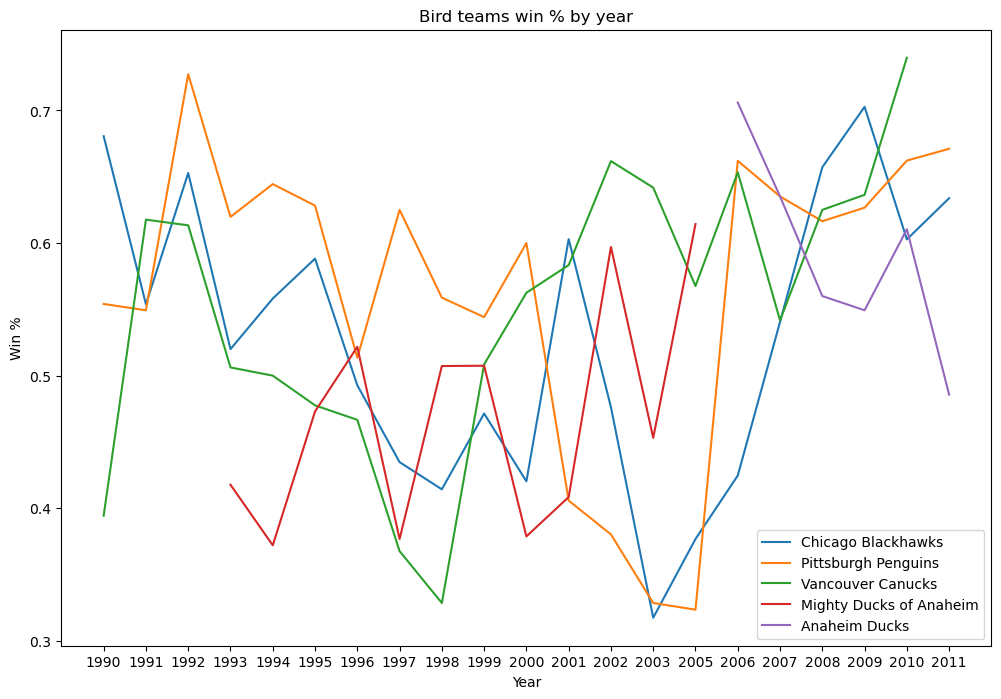

In [34]:
import matplotlib.pyplot as plt

nhl['win %']=nhl['Wins']/(nhl['Wins']+nhl['Losses'])

fig, ax = plt.subplots(figsize=(12,8))
for team in ['Chicago Blackhawks','Pittsburgh Penguins','Vancouver Canucks','Mighty Ducks of Anaheim','Anaheim Ducks']:
    filtered=nhl[nhl.Team==team]
    ax.plot(filtered.Year,filtered['win %'],label=team)
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('Win %')
    ax.set_title('Bird teams win % by year')
plt.show()